  # Predicting Pregnancy Stage from Cell free mRNA Levels
Jessie Bologna & Lindsay Reisman  
NYU Bioinformatic - Machine Learning   
5/15/21

***


## Introduction -

The goal of the below project is to utilize various machine learning methods on a dataset of our choosing to test which methods works the best on our data set. 

The data set we used is called 'Microarray Data of cell-free RNA across pregnancy time course', and was obtained from the NCBI Gene Express Omnibus databse (Koh et al., 2014). The data contains 48 total samples, which includes RNA samples taken from 12 patients over the course of their pregnancy at time intervals of first trimester, second trimester, thrid trimester, and post-partem. One of the patients is a control who was not pregnant. The data includes expression values of these samples over 33,297 genes.  



## Methods - 

To determine which machine learning method worked best for our dataset we begin by loading our data, inspecting and visualizing it, testing it, and continue with additional preprocessing before we finally test our data on various classifivation models. 

In [72]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

In [2]:
# Ignore unimportant warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings("ignore")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

### Import the Data
The data consists of 48 samples (12 patients) over the course of 5 stages of pregnancy: first, second, and third trimester, postpartem, and control/non-pregnant

Microarray data of cell free RNA was collected across 33,297 genes for each patient during each of these time courses
    

In [3]:
# import the data
df = pd.read_csv('GSE56899_series_matrix.txt',sep = '\t')
# define the column names
columns = ['ID_REF','pt1_t1', 'pt1_t2', 'pt1_t3', 'pt1_pp', 'pt2_t1', 'pt2_t2', 'pt2_t3', 'pt2_pp', 'pt3_t1', 'pt3_t2','pt3_t3', 'pt3_pp', 'pt4_t1', 'pt4_t2', 'pt4_t3', 'pt4_pp', 'pt5_t1', 'pt5_t2', 'pt5_t3', 'pt5_pp', 'pt6_t1','pt6_t2', 'pt6_t3', 'pt6_pp', 'pt7_t1', 'pt7_t2', 'pt7_t3', 'pt7_pp', 'pt8_t1', 'pt8_t2', 'pt8_t3', 'pt8_pp', 'pt9_t1', 'pt9_t2', 'pt9_t3', 'pt9_pp', 'pt10_t1', 'pt10_t2', 'pt10_t3', 'pt10_pp', 'pt11_t1', 'pt11_t2', 
           'pt11_t3', 'pt11_pp', 'pt12_control', 'pt12_control', 'pt12_control', 'pt12_control']

# set the column names
df.columns = columns

# set the index column
df.set_index('ID_REF', inplace = True)

### Data Prepocessing 
We started with the standard data preprocessing steps; removing any missing values in the data, and transposing the dataset to be the proper shape needed for running our models

In [4]:
# remove any missing values
df.dropna(inplace=True)
# transpose the dataframe 
df_t = df.transpose()
df_t.describe()

ID_REF,7892501,7892502,7892503,7892504,7892505,7892506,7892507,7892508,7892509,7892510,...,8180409,8180410,8180411,8180412,8180413,8180414,8180415,8180416,8180417,8180418
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,5.004943,2.482006,2.561178,7.310324,2.787235,2.605373,3.165746,2.243372,10.500638,2.562259,...,11.946849,10.312863,8.729550,5.606498,5.531304,4.500168,3.566437,4.229723,4.713113,6.958093
std,1.853566,0.287033,0.247941,1.055773,0.425361,0.404084,0.727252,0.186912,1.742822,0.266118,...,0.645432,0.727021,1.149331,0.544848,0.473045,0.321836,0.645544,0.336192,0.687966,0.878578
min,2.089713,1.938133,1.982890,5.428908,2.102378,2.122335,2.367414,1.923975,2.718209,2.022346,...,7.643652,6.219645,5.253879,4.610632,4.704429,3.969056,2.945505,3.754242,3.432273,4.973555
25%,3.286410,2.287814,2.390578,6.533863,2.540726,2.351941,2.791254,2.106138,10.338530,2.390800,...,11.976620,10.136710,8.073634,5.227595,5.220778,4.282611,3.160338,3.967621,4.256973,6.438553
50%,5.519676,2.446147,2.514482,7.021481,2.696597,2.464081,2.975391,2.231955,10.952625,2.561447,...,12.035485,10.439085,9.131304,5.492380,5.427062,4.443596,3.319454,4.091791,4.534680,6.922974
75%,6.390771,2.619133,2.759148,8.047929,2.965962,2.745546,3.281732,2.346940,11.409250,2.682029,...,12.119032,10.698903,9.442569,5.912264,5.854077,4.690992,3.733180,4.510201,5.113005,7.541776
max,9.105850,3.351691,3.142344,10.706420,4.643989,4.226218,7.068907,2.800776,11.993470,3.234456,...,12.279910,11.043520,10.496080,7.584900,7.138811,5.619216,5.492873,5.360121,6.714379,8.863344


### Normalize the data across samples - 

In order to be able to compare our samples against each other we needed to normalize the data or account for any outliers. Here we used Log2 to normalize the data. 

Once normalized, we seperated our data by target values and by feature values as X and y respectively. 

In [5]:
# normalize across the data to see how the samples compare to each other (look for outliers etc)
df_t = df_t.applymap(np.log2)

In [6]:
# Add our class/target column - trimester 1, trimester 2, trimester 3, post-partem, and non-preg/ control
y = [1, 2, 3, 4] * 11    
y1 = [0, 0, 0, 0]    
y = y + y1

# add our classes/ taget col to the df_t dataframe
df_t['y'] = y
y = df_t['y'].values

# get our X and y values
X_labels = df_t.columns[0:33297]
X = np.array(df_t[X_labels].values)
print(X.shape)
print(y.shape)

(48, 33297)
(48,)


In [7]:
# get the totals by row
df_t['totals'] = df_t.sum(axis=1)

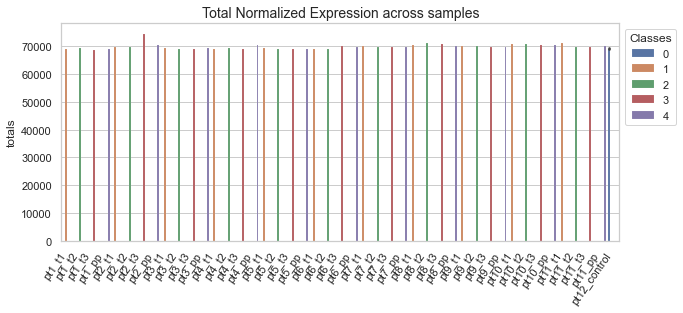

In [8]:
# Plot the normalized differences between samples
plt.figure(figsize=(10,4))
sns.set_theme(style = 'whitegrid')
sns.barplot(x=df_t.index, y='totals', hue = 'y', data=df_t,
            edgecolor='1', ci = 'sd', linewidth= .1)
plt.xlabel='samples'
plt.ylabel='total expression'
plt.title('Total Normalized Expression across samples', fontsize='14')
plt.xticks(rotation=55, ha='right')
plt.legend(title = 'Classes', bbox_to_anchor = (1, 1))
plt.show()

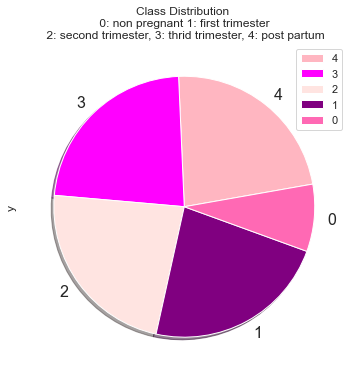

In [9]:
# see our class distribution  
colors = ['lightpink','magenta', 'mistyrose', 'purple', 'hotpink']
plt.figure(figsize = (6,6))
classes = (df_t[df_t.y != -1])['y'].value_counts()
classes.plot.pie(colors = colors, shadow = True, startangle = 10, 
                 title = 'Class Distribution \n 0: non pregnant 1: first trimester \n 2: second trimester, 3: thrid trimester, 4: post partum', fontsize = 16)
plt.legend()
plt.show()

### Further data processing
After reviewing the data in more detail, we were able to determine that additional preprocessing was need. 

We decided to select the genes with the highest variability between samples and/or between time periods of the same sample in order to make any meaningful analysis. We noted that the highest variablity between the classes were between the third trimester and post-partem. 

Next, we seperated the data by patient, and then caclculated the differential expression values for each patient from the thirs trimester and post-partem. Note; we eliminated the control patient 12 from our study at this point. 

In [91]:
# seperate out info for each patient 
pt1 = df_t[:4]
pt2 = df_t[4:8]
pt3 = df_t[8:12]
pt4 = df_t[12:16]
pt5 = df_t[16:20]
pt6 = df_t[20:24]
pt7 = df_t[24:28]
pt8 = df_t[28:32]
pt9 = df_t[32:36]
pt10 = df_t[36:40]
pt11 = df_t[40:44]
#pt12 = X[44:48] # non-pregnant/control samples

In [92]:
# differential expressions between for each pt - from trimester 3 and postpartum
pt1.loc['1'] = pt1.loc['pt1_t3']-pt1.loc['pt1_pp']
pt2.loc['2'] = pt2.loc['pt2_t3']-pt2.loc['pt2_pp']
pt3.loc['3'] = pt3.loc['pt3_t3']-pt3.loc['pt3_pp']
pt4.loc['4'] = pt4.loc['pt4_t3']- pt4.loc['pt4_pp']
pt5.loc['5'] = pt5.loc['pt5_t3']-pt5.loc['pt5_pp']
pt6.loc['6'] = pt6.loc['pt6_t3']-pt6.loc['pt6_pp']
pt7.loc['7'] = pt7.loc['pt7_t3']-pt7.loc['pt7_pp']
pt8.loc['8'] = pt8.loc['pt8_t3']-pt8.loc['pt8_pp']
pt9.loc['9'] = pt9.loc['pt9_t3']-pt9.loc['pt9_pp']
pt10.loc['10'] = pt10.loc['pt10_t3']-pt10.loc['pt10_pp']
pt11.loc['11'] = pt11.loc['pt11_t3']-pt11.loc['pt11_pp']

In [93]:
#filter out the differential expression
p1 = pt1.filter(['1'], axis=0)
p2 = pt2.filter(['2'], axis=0)
p3 = pt3.filter(['3'], axis=0)
p4 = pt4.filter(['4'], axis=0)
p5 = pt5.filter(['5'], axis=0)
p6 = pt6.filter(['6'], axis=0)
p7 = pt7.filter(['7'], axis=0)
p8 = pt8.filter(['8'], axis=0)
p9 = pt9.filter(['9'], axis=0)
p10 = pt10.filter(['10'], axis=0)
p11 = pt11.filter(['11'], axis=0)

In [94]:
#combine dataframes back together
frames = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11]
de = pd.concat(frames)

#remove 'y' from the dataframe
de = de.drop('y', axis = 1)

### Determine genes with highest differential expression between the two classes -

Our dataset contains over 30,000 genes, this makes predictions challenging. In order to reduce the number of genes in our dataset we decided to focus on just the top 30 genes with the highest differential expression between the thrid trimester and post-partem samples for each patient.

In [95]:
# remove any missing values
de.dropna(inplace=True)

df_4 = de.sum()
print(df_4.nlargest(15).index)

df_5 = de.sum()
print(df_4.nsmallest(15).index)

Index(['totals',  8128001,  8070458,  8017488,  7951662,  7951246,  8180304,
        7893349,  8084206,  7918694,  8019842,  8180400,  8167693,  8172749,
        8037251],
      dtype='object', name='ID_REF')
Index([8174251, 7894627, 8021147, 7895904, 7945040, 7943160, 7930870, 7896069,
       7896704, 8088911, 8035793, 7896123, 7893549, 8020806, 7896558],
      dtype='object', name='ID_REF')


### Data Visualization
Lets see how the top genes are expressed across the samples

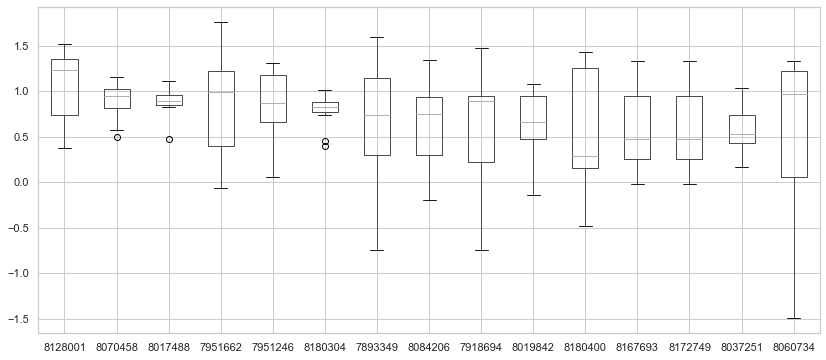

In [99]:
#sorting for all normalized highest and lowest DE genes
df_top_genes = de[[8128001, 8070458, 8017488, 7951662, 7951246, 8180304, 7893349, 8084206,
       7918694, 8019842, 8180400, 8167693, 8172749, 8037251, 8060734]]
df_top_genes = df_top_genes.assign(pt = ['1', '2', '3', '4','5','6','7','8','9','10','11'])
#plot boxplot for each gene
import seaborn as sns
fig = plt.figure(figsize =(14, 6))
boxplot = df_top_genes.boxplot()

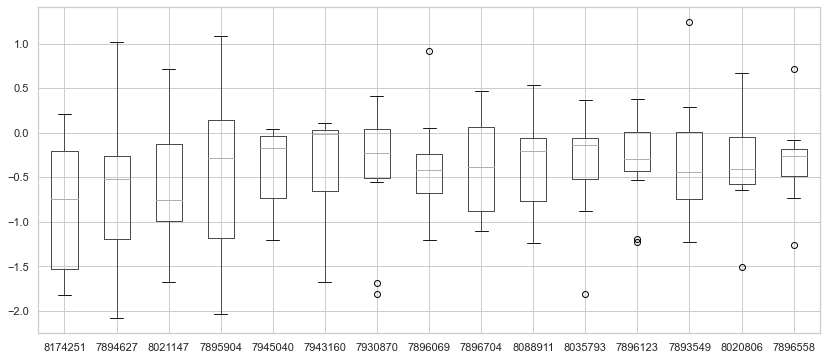

In [97]:
#sorting for all normalized highest expression genes
df_top_genes2 = de[[8174251, 7894627, 8021147, 7895904, 7945040, 7943160, 7930870, 7896069,
       7896704, 8088911, 8035793, 7896123, 7893549, 8020806, 7896558]]
df_top_genes2 = df_top_genes2.assign(pt = ['1', '2', '3', '4','5','6','7','8','9','10','11'])
#plot boxplot for each gene
import seaborn as sns
fig = plt.figure(figsize =(14, 6))
boxplot = df_top_genes2.boxplot()

In [100]:
# sort the dataframe by y
sorted_df = df_t.sort_values(by=['y'], ascending=False)

# break down the data by time interval
pp = sorted_df[:11]
tri3 = sorted_df[11:22]
tri2 = sorted_df[22:33]
tri1 = sorted_df[33:44]
control = sorted_df[44:48]

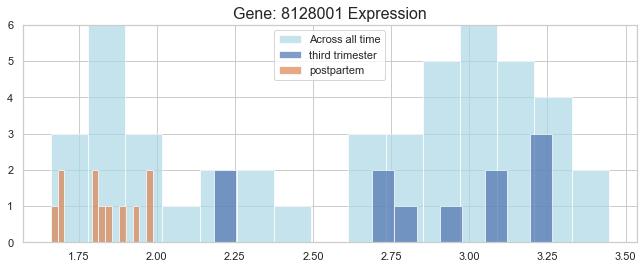

In [113]:
gene1 = df_t[8128001]  
plt.figure(figsize = (11,4))
plt.hist(gene1.values, bins=15, color='lightblue', alpha=0.7, label='Across all time') # Plot distribution
#plt.hist(tri1[8128001], bins=15, alpha=0.7, label='First trimester')
#plt.hist(tri2[8128001], bins=15, alpha=0.7, label='second trimester')
plt.hist(tri3[8128001], bins=15, alpha=0.7, label='third trimester')
plt.hist(pp[8128001], bins=15, alpha=0.7, label='postpartem')
plt.ylim(0,6) # Cut off at N=100 for visual clarity
plt.xlabel='samples' # label our axes
plt.ylabel='8128001 expression values'
plt.title('Gene: 8128001 Expression', fontsize='16')
plt.legend()
plt.show()

### Putting it all together-  Creating our final dataframe:

At this point we finished with the data preprocessing steps and are almost ready to start creating our models. First we have to create our final dataframe with the new curated data from the above steps.  Our dataframe will now only include the top 22 genes and sample data from the third trimester and post-partem.

In [102]:
# Now recreate the dataframe with just the top 30 DE genes included
top_de_df = df_t[[8128001, 8070458, 8017488, 7951662, 7951246, 8180304, 7893349, 8084206, 
              7918694, 8019842, 8180400, 8167693, 8172749, 8037251, 8060734, 8174251, 
              7894627, 8021147, 7895904, 7945040, 7943160, 7930870, 7896069,
              7896704, 8088911, 8035793, 7896123, 7893549, 8020806, 7896558]]

top_de_df.head(3)

ID_REF,8128001,8070458,8017488,7951662,7951246,8180304,7893349,8084206,7918694,8019842,...,7943160,7930870,7896069,7896704,8088911,8035793,7896123,7893549,8020806,7896558
pt1_t1,3.183323,2.059436,2.760217,1.796702,1.81552,2.704527,2.721869,1.536305,1.675357,2.657084,...,2.325390,3.277669,3.040849,2.192983,1.888929,2.433972,2.850714,2.498484,2.462512,2.312815
pt1_t2,3.095638,2.937659,3.260248,1.680922,1.81646,3.238912,2.351149,1.602896,1.993895,2.578314,...,1.124461,3.216098,1.889430,3.117884,1.628982,2.453519,2.701383,2.121202,2.398221,2.830989
pt1_t3,3.110749,2.788043,3.399286,2.982963,2.81963,3.334697,2.896474,2.467626,2.920777,2.927450,...,1.160452,3.377118,2.534738,2.713673,2.562716,2.295309,3.020755,2.912745,2.558091,2.709162


In [103]:
# get rid of the control/non-preg sample 
top_de_df = top_de_df.iloc[:-4]

### Some additional processing/ visualization step - PCA

In [104]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# top_de_df.reset_index()
top_transformed=top_de_df.T
#top_transformed
scaler = StandardScaler()
X = scaler.fit_transform(top_de_df.T)
cmat=np.cov(X.T)
eigen_vals, eigen_vecs = np.linalg.eig(cmat)
print(eigen_vals)

[ 1.91794621e+01+0.00000000e+00j  7.22504289e+00+0.00000000e+00j
  2.97617710e+00+0.00000000e+00j  1.94886231e+00+0.00000000e+00j
  1.70941887e+00+0.00000000e+00j  1.62042093e+00+0.00000000e+00j
  1.53895311e+00+0.00000000e+00j  1.26707144e+00+0.00000000e+00j
  1.12455424e+00+0.00000000e+00j  1.02149032e+00+0.00000000e+00j
  9.29185145e-01+0.00000000e+00j  7.52639578e-01+0.00000000e+00j
  6.08469534e-01+0.00000000e+00j  5.88395084e-01+0.00000000e+00j
  5.01804496e-01+0.00000000e+00j  4.78543077e-01+0.00000000e+00j
  3.82559259e-01+0.00000000e+00j  3.67303979e-01+0.00000000e+00j
  2.76026382e-01+0.00000000e+00j  2.53171743e-01+0.00000000e+00j
  2.21283132e-01+0.00000000e+00j  1.54559109e-01+0.00000000e+00j
  1.32628186e-01+0.00000000e+00j  8.54943873e-02+0.00000000e+00j
  9.21131315e-02+0.00000000e+00j  4.36182217e-02+0.00000000e+00j
  2.89340086e-02+0.00000000e+00j  9.05960517e-03+0.00000000e+00j
 -6.47347131e-16+0.00000000e+00j -5.02974430e-16+1.18285119e-16j
 -5.02974430e-16-1.182851

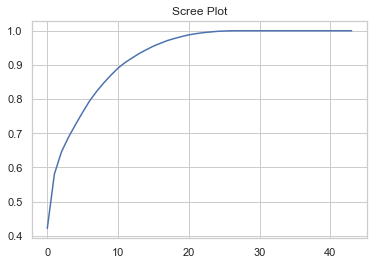

In [105]:
tot = sum(eigen_vals)
ve = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(ve)

#plt.ylabel('% Variance Explained')
#plt.xlabel('# of Features')
plt.title('Scree Plot')

plt.plot(cum_var_exp)

In [106]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0],reverse=True)

arr = np.hstack((eigen_pairs[0][1][:,np.newaxis],
             eigen_pairs[1][1][:,np.newaxis]))
#arr

In [107]:
X_pca = X.dot(arr)
pca = PCA(n_components=2)
Pc=pca.fit_transform(X)
pca_df = pd.DataFrame(data = Pc, columns = ['PC1', 'PC2'])
y=[8128001, 8070458, 8017488, 7951662, 7951246, 8180304, 7893349, 8084206, 
              7918694, 8019842, 8180400, 8167693, 8172749, 8037251, 8060734, 8174251, 
              7894627, 8021147, 7895904, 7945040, 7943160, 7930870, 7896069,
              7896704, 8088911, 8035793, 7896123, 7893549, 8020806, 7896558]

d = pd.DataFrame(data=y, columns = ['transcript'])
pca_df1 = pd.concat([d, pca_df], axis=1)
print(pca_df1)

    transcript        PC1       PC2
0      8128001  -4.708409 -3.674894
1      8070458  -2.173753 -3.028606
2      8017488  -8.253939 -2.043587
3      7951662   0.620275 -2.581843
4      7951246  -1.257806 -2.833163
5      8180304  -7.533641 -1.666000
6      7893349  -0.793591 -1.491318
7      8084206   5.038818 -2.540674
8      7918694   1.790848 -2.551993
9      8019842  -4.105855 -1.579047
10     8180400   5.428413 -3.021046
11     8167693   1.682236 -2.199051
12     8172749   1.682236 -2.199051
13     8037251  -2.506357 -2.209810
14     8060734   1.316472 -3.157806
15     8174251   1.073885  4.904768
16     7894627   3.896112  2.589029
17     8021147   0.165358  3.816341
18     7895904   1.511030  1.741815
19     7945040   8.428839  0.441460
20     7943160  10.886346  0.503732
21     7930870  -5.990301  4.623091
22     7896069  -3.410216  2.507395
23     7896704  -2.366791  2.785648
24     8088911   2.017833  1.562973
25     8035793   0.797581  2.133118
26     7896123  -6.534514  2

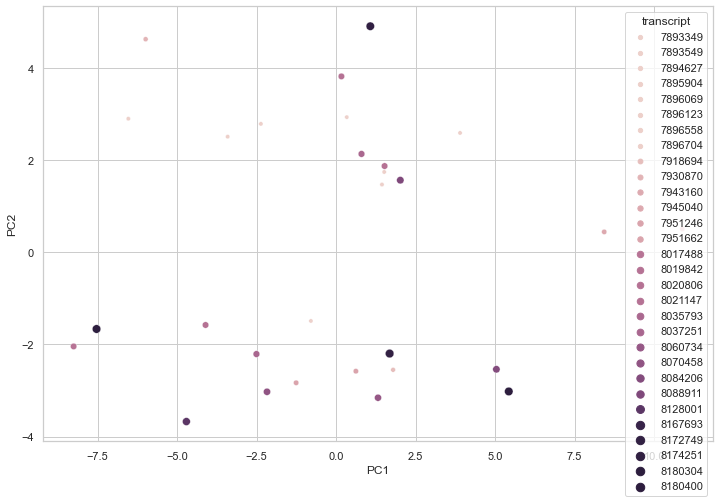

In [111]:
plt.figure(figsize = (12,8))
sns.scatterplot( x="PC1", y="PC2",
                data=pca_df1, 
                hue = 'transcript',
                size='transcript',
                legend='full')
plt.show()

### Models: Testing on the full dataset - all classes (minus control class)

We begin by running various classification models on all the classes to see how they perform, and what areas we might need to improve upon. 

In [109]:
# add in our y 
y1 = [1,2,3, 4] * 11    

# add our classes/ taget col to the new dataframe
top_de_df['y'] = y1
y1 = top_de_df['y'].values



# get our X and y values
X_labels = top_de_df.columns[0:30]
X1 = np.array(top_de_df[X_labels].values)

In [39]:
# run a few standard classification models with default parameters and kfold cv
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB())]

for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=5)
    results = model_selection.cross_val_score(model, X1, y1, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.527778 STD=0.138332
SVM| Mean=0.522222 STD=0.044444
DecTree| Mean=0.594444 STD=0.213437
KNN| Mean=0.433333 STD=0.088889
LinDisc| Mean=0.477778 STD=0.129577
GaussianNB| Mean=0.522222 STD=0.129577


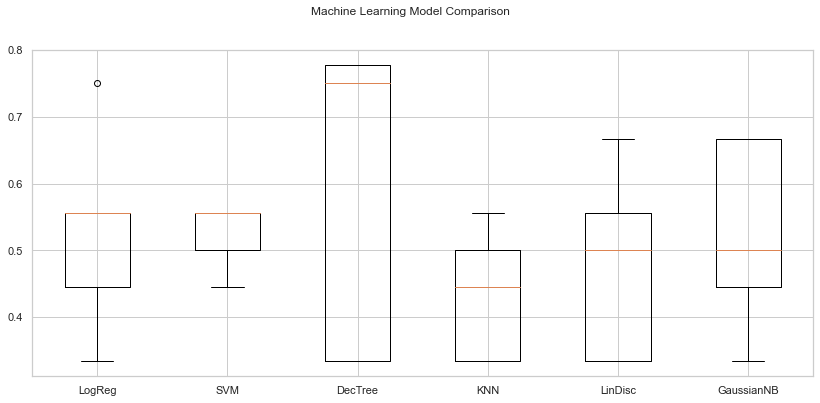

In [40]:
fig = plt.figure(figsize=(14,6))
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

In [41]:
# Seperate into test and train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.3) 

In [42]:
# scaling the features - standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [43]:
svc = svm.SVC(kernel='linear', C =0.5)
svc.fit(X_train_std, y_train)

y_hat = svc.predict(X_test_std)

# Calculate accuracy 
print(pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted']))
print('Accuracy =', accuracy_score(y_test, y_hat))

print(classification_report (y_test, y_hat))

Predicted  1  2  4
Actual            
1          2  1  0
2          1  1  0
3          2  3  0
4          0  1  3
Accuracy = 0.42857142857142855
              precision    recall  f1-score   support

           1       0.40      0.67      0.50         3
           2       0.17      0.50      0.25         2
           3       0.00      0.00      0.00         5
           4       1.00      0.75      0.86         4

    accuracy                           0.43        14
   macro avg       0.39      0.48      0.40        14
weighted avg       0.40      0.43      0.39        14



In [44]:
# Update the SVC model to see if we can get a better performance
svc1 = svm.SVC(kernel='linear', C =.05, gamma='auto')  # changed regularization, kernel = linear
svc1.fit(X_train_std, y_train)

# add in cross validation
scores1 = cross_val_score(svc1, X_test_std, y_test, cv=4)
print(scores1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

y_hat1 = svc1.predict(X_test_std)

# Calculate accuracy 
print(pd.crosstab(y_test, y_hat1, rownames=['Actual'], colnames=['Predicted']))
print('Accuracy =', accuracy_score(y_test, y_hat1))

print(classification_report (y_test, y_hat1))

[0.5 0.5 0.  1. ]
0.50 accuracy with a standard deviation of 0.35
Predicted  1  2  4
Actual            
1          2  1  0
2          1  1  0
3          2  3  0
4          0  1  3
Accuracy = 0.42857142857142855
              precision    recall  f1-score   support

           1       0.40      0.67      0.50         3
           2       0.17      0.50      0.25         2
           3       0.00      0.00      0.00         5
           4       1.00      0.75      0.86         4

    accuracy                           0.43        14
   macro avg       0.39      0.48      0.40        14
weighted avg       0.40      0.43      0.39        14



In [45]:
# Create decision tree with adaboost classifer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Create a decision tree object
tree = DecisionTreeClassifier()

# Fit on training data
tree.fit(X_train_std, y_train)
abc = AdaBoostClassifier(base_estimator=tree)

# Train Adaboost Classifer
model = abc.fit(X_train_std, y_train)

#Predict the response with test dataset
y_pred = model.predict(X_test_std)

print("Accuracy for Decision Tree model: ", accuracy_score(y_test,y_pred)*100) ## Still not great

# Make a Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

Accuracy for Decision Tree model:  42.857142857142854
Predicted  1  2  3  4
Actual               
1          2  1  0  0
2          1  1  0  0
3          0  4  1  0
4          2  0  0  2


In [59]:
# Try Gridsearch to tune the hyperparameters to see if we get better accuracy
from sklearn.model_selection import GridSearchCV
tree_param = {'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,7,8,9,10,11,12,15,20],
             'min_samples_split':[3,4,5,10,20,30,40,50,60,70,80,90,100], 
             'min_samples_leaf':[2,3,4,5,6,7,8,9,10], 
             'max_features':list(range(1,X_train_std.shape[1])), 
             'max_features': ['auto', 'sqrt', 'log2'],
             'presort':[True, False]
            }
grid = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=4)
grid.fit(X_train_std, y_train)
#best_predict = grid.best_score_(y_test)
print('Best Accuracy = ',grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#print(pd.crosstab(y_test, best_predict, rownames=['Actual'], colnames=['Predicted']))

Best Accuracy =  0.6696428571428572
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'presort': False}
DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=5, presort=False)


In [60]:
# Now use adaboost on the gridsearch results to see if we can get an even better prediction
tree = grid.best_estimator_
tree.fit(X_train_std, y_train)

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=10,
                         base_estimator=tree)
# Train Adaboost Classifer
tree2 = abc.fit(X_train_std, y_train)

# Predict the response for test dataset
y_hat2 = tree2.predict(X_test_std)
print("Accuracy:",accuracy_score(y_test, y_hat2))

Accuracy: 0.21428571428571427


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rfc = RandomForestClassifier(n_estimators = 20, 
                                    criterion = 'entropy')
rfc.fit(X_train_std, y_train)
y_pred = rfc.predict(X_test_std)

# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))
print('Accuracy =', accuracy_score(y_test, y_pred))

Predicted  1  2  4
Actual            
1          1  2  0
2          0  2  0
3          0  5  0
4          0  0  4
Accuracy = 0.5


In [48]:
lrc = LogisticRegression().fit(X_train_std, y_train)
y_hat4 = lrc.predict(X_test_std)

# Making the Confusion Matrix
print(pd.crosstab(y_test, y_hat4, rownames=['Actual'], colnames=['Predicted']))
print('Accuracy =', accuracy_score(y_test, y_hat4))

Predicted  1  2  3  4
Actual               
1          2  1  0  0
2          1  1  0  0
3          0  4  1  0
4          0  1  0  3
Accuracy = 0.5


### Testing on just the two classes - Third trimester vs post-partem

In [62]:
# Keep just samples from 3rd trimester and post-partem
array = [3, 4]
df_3 = top_de_df.loc[top_de_df['y'].isin(array)]
df_3.head()

ID_REF,8128001,8070458,8017488,7951662,7951246,8180304,7893349,8084206,7918694,8019842,...,7930870,7896069,7896704,8088911,8035793,7896123,7893549,8020806,7896558,y
pt1_t3,3.110749,2.788043,3.399286,2.982963,2.819630,3.334697,2.896474,2.467626,2.920777,2.927450,...,3.377118,2.534738,2.713673,2.562716,2.295309,3.020755,2.912745,2.558091,2.709162,3
pt1_pp,1.660869,1.844100,2.431636,1.538719,1.633755,2.511137,2.318703,1.475046,1.677346,1.941945,...,3.060299,3.222969,3.091271,2.757907,2.958503,2.948286,2.625796,2.969104,2.840319,4
pt2_t3,2.737647,2.789186,3.313469,2.594676,3.441163,3.054447,2.676358,2.808282,3.135397,3.346357,...,3.380631,2.930025,2.756968,2.485736,2.432636,2.881689,2.036162,2.484076,1.680420,3
pt2_pp,1.988295,2.218284,2.466469,1.645306,2.403199,2.606033,1.085504,1.464668,2.187160,2.601413,...,2.970468,3.381897,2.290621,2.211037,2.562911,3.406854,3.258261,1.810349,1.756897,4
pt3_t3,3.204279,3.087972,3.474054,3.010974,3.255985,3.453194,2.761356,2.424237,3.098977,3.080086,...,3.084699,2.622824,2.383003,1.655158,2.674994,2.869472,2.393483,1.901622,2.171639,3


### Splitting our data - 

We split the final dataframe into our target values (y), and feature values (X). Then we further split the data into a training dataset and a testing dataset which we will be using to train and test our models. 

In [63]:
# Re-create our X and y matrices  
y1 = [3, 4] * 11    

# add our classes/ taget col to the dataframe
df_3['y'] = y1
y1 = df_3['y'].values

# get our X and y values
X_labels = df_3.columns[0:30]
X1 = np.array(df_3[X_labels].values)

print(y1.shape)
print(X1.shape)

(22,)
(22, 30)


### PCA Across patients from 3rd trimester and post-partem

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(df_3)
cmat=np.cov(X.T)
eigen_vals, eigen_vecs = np.linalg.eig(cmat)
print(eigen_vals)

[ 1.37001268e+01+0.00000000e+00j  3.71963720e+00+0.00000000e+00j
  2.80786931e+00+0.00000000e+00j  2.12881897e+00+0.00000000e+00j
  1.73468595e+00+0.00000000e+00j  1.50600447e+00+0.00000000e+00j
  1.34679103e+00+0.00000000e+00j  1.01050781e+00+0.00000000e+00j
  8.91575337e-01+0.00000000e+00j  7.54832407e-01+0.00000000e+00j
  6.63000059e-01+0.00000000e+00j  5.84984929e-01+0.00000000e+00j
  4.33279985e-01+0.00000000e+00j  3.20753156e-01+0.00000000e+00j
  2.70728330e-01+0.00000000e+00j  2.15162526e-01+0.00000000e+00j
  1.36730472e-01+0.00000000e+00j  9.88228027e-02+0.00000000e+00j
  7.09368449e-02+0.00000000e+00j  4.75666910e-02+0.00000000e+00j
  3.33754136e-02+0.00000000e+00j  1.05100450e-15+0.00000000e+00j
 -4.73778712e-16+0.00000000e+00j -4.49437527e-16+0.00000000e+00j
  2.99865877e-16+0.00000000e+00j  1.25413641e-16+1.55879276e-16j
  1.25413641e-16-1.55879276e-16j  1.26445382e-17+9.08685342e-17j
  1.26445382e-17-9.08685342e-17j -1.23028549e-16+0.00000000e+00j
 -2.20538142e-16+0.000000

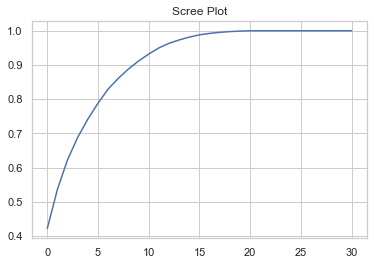

In [65]:
tot = sum(eigen_vals)
ve = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(ve)


# plt.ylabel('% Variance Explained')
#plt.xlabel('# of Features')
plt.title('Scree Plot')

plt.plot(cum_var_exp)

In [66]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0],reverse=True)

arr = np.hstack((eigen_pairs[0][1][:,np.newaxis],
             eigen_pairs[1][1][:,np.newaxis]))

#arr

In [67]:
# PCA across patient groups
X_pca = X.dot(arr)
pca = PCA(n_components=2)
Pc=pca.fit_transform(X)
pca_df = pd.DataFrame(data = Pc, columns = ['PC1', 'PC2'])


In [68]:
d = pd.DataFrame(data=y1, columns = ['patients'])
pca_df1 = pd.concat([d, pca_df], axis=1)
print(pca_df1)

    patients       PC1       PC2
0          3  2.430827 -2.543240
1          4 -4.560385 -1.073866
2          3  4.386897 -0.629315
3          4 -3.053299  1.277703
4          3  5.117675 -2.190759
5          4 -3.744242 -0.762400
6          3  3.881749 -1.103985
7          4 -1.632839  0.011237
8          3  4.132520 -0.903661
9          4 -3.816763 -1.272172
10         3  2.641036 -0.398122
11         4 -4.644298 -1.029306
12         3  3.911312  4.909000
13         4 -3.820971 -0.340294
14         3  2.789401  2.973549
15         4 -2.500288  0.670597
16         3  1.069752  3.889085
17         4 -2.324165  0.816336
18         3  4.356599 -0.676356
19         4 -4.156642 -0.828046
20         3  3.473014 -2.328394
21         4 -3.936892  1.532410


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

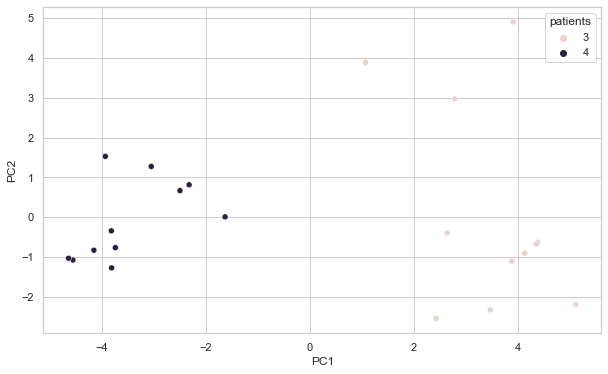

In [69]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot( x="PC1", y="PC2",
                data=pca_df1, 
                hue = 'patients',
                legend='full') # specify the point size

## Test some classification models on new dataset - 

In [77]:
# run a few standard classification models with default parameters and kfold cv on our new dataframe
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB()),
          ('RFC', RandomForestClassifier()),
          ('AdaBoost', AdaBoostClassifier()),
          ('MLP', MLPClassifier())]

for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=5)
    results = model_selection.cross_val_score(model, X1, y1, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=1.000000 STD=0.000000
SVM| Mean=0.960000 STD=0.080000
DecTree| Mean=1.000000 STD=0.000000
KNN| Mean=1.000000 STD=0.000000
LinDisc| Mean=1.000000 STD=0.000000
GaussianNB| Mean=1.000000 STD=0.000000
RFC| Mean=1.000000 STD=0.000000
AdaBoost| Mean=1.000000 STD=0.000000
MLP| Mean=1.000000 STD=0.000000


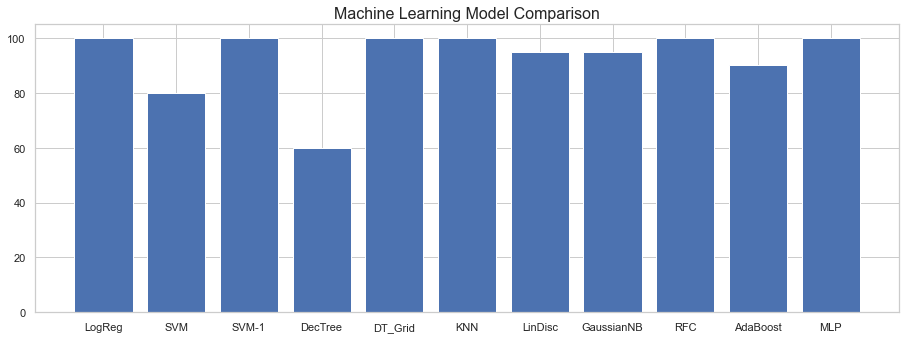

In [76]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
models1 = ['LogReg','SVM', 'SVM-1','DecTree','DT_Grid','KNN','LinDisc', 'GaussianNB','RFC', 'AdaBoost', 'MLP']
results = [100,80,100,60, 100, 100,95,95,100,90,100]
ax.bar(models1,results)
plt.title('Machine Learning Model Comparison', fontsize=(16))
plt.show()

## Results: 

### Models: Classification and Prediction 

Now our data is are ready to be used to begin testing various machine learning classification models. 

After testing our a few models we were able to determine that most of the models ran with a very high accuracy rate. SVM, decision trees, and random forest all performed the best when the hyper-parameters were carefully selected. 

For the SVM models, after adjusting the kernal to 'linear' and the regularization parameter to 0.05 the performance increased from around 88% to 100% accruacy. 

The decision tree model performed poorly with the default parameters, but when adjusted using gridsearch to find the best parameters the model improved from around 55% to 100%. 


In [79]:
# Seperate into test and train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.4) 

In [80]:
# scaling the features - standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [81]:
svc = svm.SVC(kernel='rbf', C =1)
svc.fit(X_train_std, y_train)

y_hat = svc.predict(X_test_std)

# Calculate accuracy 
print(pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted']))
print('Accuracy =', accuracy_score(y_test, y_hat))

print(classification_report (y_test, y_hat))

Predicted  3  4
Actual         
3          6  0
4          0  3
Accuracy = 1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [82]:
# Update the SVC model to see if we can get a better performance
svc1 = svm.SVC(kernel='linear', C =0.05, gamma='auto')  # changed regularization, kernel = linear, C = 0.05
svc1.fit(X_train_std, y_train)

# add in cross validation
scores1 = cross_val_score(svc1, X_test_std, y_test, cv=5)
print(scores1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

y_hat1 = svc1.predict(X_test_std)

# Calculate accuracy 
print(pd.crosstab(y_test, y_hat1, rownames=['Actual'], colnames=['Predicted']))
print('Accuracy =', accuracy_score(y_test, y_hat1))

print(classification_report (y_test, y_hat1))

[1. 1. 1. 1. 1.]
1.00 accuracy with a standard deviation of 0.00
Predicted  3  4
Actual         
3          6  0
4          0  3
Accuracy = 1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [83]:
# Create decision tree with adaboost classifer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Create a decision tree object
tree = DecisionTreeClassifier()

# Fit on training data
tree.fit(X_train_std, y_train)
abc = AdaBoostClassifier(base_estimator=tree)

# Train Adaboost Classifer
model = abc.fit(X_train_std, y_train)

#Predict the response with test dataset
y_pred = model.predict(X_test_std)

print("Accuracy for Decision Tree model: ", accuracy_score(y_test,y_pred)*100) ## Still not great

# Make a Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

Accuracy for Decision Tree model:  88.88888888888889
Predicted  3  4
Actual         
3          5  1
4          0  3


In [84]:
# Try Gridsearch to tune the hyperparameters to see if we get better accuracy
from sklearn.model_selection import GridSearchCV
tree_param = {'criterion':['gini','entropy'],
             'max_depth':[3,4,5,6,7,8,9,10,11,12,15,20],
             'min_samples_split':[5,10,20,30,40,50,60,70,80,90,100], 
             'min_samples_leaf':[2,3,4,5,6,7,8,9,10], 
             'max_features':list(range(1,X_train_std.shape[1])), 
             'max_features': ['auto', 'sqrt', 'log2'],
             'presort':[True, False]
            }
grid = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=4)
grid.fit(X_train_std, y_train)
#best_predict = grid.best_score_(y_test)
print('Best Accuracy = ',grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#print(pd.crosstab(y_test, best_predict, rownames=['Actual'], colnames=['Predicted']))

Best Accuracy =  1.0
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'presort': True}
DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=3,
                       min_samples_split=5, presort=True)


In [85]:
# Now use adaboost on the gridsearch results to see if we can get an even better prediction
tree = grid.best_estimator_
tree.fit(X_train_std, y_train)

# Create adaboost classifer object
abc1 = AdaBoostClassifier(n_estimators=100,
                         learning_rate=5,
                         base_estimator=tree)
# Train Adaboost Classifer
model3 = abc1.fit(X_train_std, y_train)

# Predict the response for test dataset
y_hat2 = model3.predict(X_test_std)
print("Accuracy:",accuracy_score(y_test, y_hat2))

Accuracy: 0.8888888888888888


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
classifier = RandomForestClassifier(n_estimators = 20, 
                                    criterion = 'entropy')
classifier.fit(X_train_std, y_train)
y_pred = classifier.predict(X_test_std)

# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))
print('Accuracy =', accuracy_score(y_test, y_pred))

Predicted  3  4
Actual         
3          5  1
4          0  3
Accuracy = 0.8888888888888888


In [87]:
model4 = LogisticRegression().fit(X_train_std, y_train)
y_hat4 = model4.predict(X_test_std)

# Making the Confusion Matrix
print(pd.crosstab(y_test, y_hat4, rownames=['Actual'], colnames=['Predicted']))
print('Accuracy =', accuracy_score(y_test, y_hat4))

Predicted  3  4
Actual         
3          6  0
4          0  3
Accuracy = 1.0


## Discussion 

It is clear to see that the performance of each model improved in the seconard part of our report after we adjusted the dataframe to test between just two classes. Determining the top genes with the most variance between these two classes also greatly improved the performance of our models. 

Most models performed at nearly 100% accuracy when predicting between class 3 and class 4 (3rd trimester vs postpartem). This model can be useful for determining to expected levels for patients at later stages of pregnancy vs patients who are not pregnant. Note that the postpartem samples represent a baseline level due to the immediate drop in fetal cfRNA after delivery. These models can also be used to train the expected levels during early pregnancy and middle pregnancy as well, and then could be used to predict if a woman is pregnant and at which stage she is in. More data processing would need to be done first to determine the top differentiated genes in each of those stages to see if the fluctuate during different stages of pregnancy. 

The models could then adjusted and potentially used to determine the health of the fetus based on the expected level of transcript expression vs the acutal level for an individual at a specific point and time during her pregnancy. 



## References - 

Koh W, Pan W, Gawad C, Fan HC et al. Noninvasive in vivo monitoring of tissue-specific global gene expression in humans. Proc Natl Acad Sci U S A 2014 May 20;111(20):7361-6. PMID: 24799715

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.